# Genre recognition: experiment

Goal: observe the effect of $\lambda_g$.

Conclusion: A value of $\lambda_s$ between 1 and 10 seems reasonable (when $\lambda_g = \lambda_d = 100$).

Observation:
* Too sparse is very slow (17h) and gives poor accuracy.
* Sparsity is proportional to $\lambda_s$.

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'ls'
Pvalues = [0.1, 1, 10, 100, 1e3]

# Regenerate the graph or the features at each iteration.
regen_graph = False
regen_features = True

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'cosine'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ls'] = 1
p['ld'] = 100
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5

### Numerical parameters

In [3]:
# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-6  # 1e-3, 1e-5, 1e-7
p['N_inner'] = 500
p['N_outer'] = 50

# Classification.
p['Nfolds'] = 10
p['Ncv'] = 20
p['dataset_classification'] = 'Z'

## Processing

In [4]:
import numpy as np
import time

texperiment = time.time()

# Result dictionary.
res = ['accuracy', 'accuracy_std']
res += ['sparsity', 'atoms']
res += ['objective_g', 'objective_h', 'objective_i', 'objective_j']
res += ['time_features', 'iterations_inner', 'iterations_outer']
res = dict.fromkeys(res)
for key in res.keys():
    res[key] = []

def separator(name, parameter=False):
    if parameter:
        name += ', {} = {}'.format(Pname, p[Pname])
    dashes = 20 * '-'
    print('\n {} {} {} \n'.format(dashes, name, dashes))
    # Fair comparison when tuning parameters.
    # Randomnesses: dictionary initialization, training and testing sets.
    np.random.seed(1)


 -------------------- Graph -------------------- 

Data: (149000, 96), float32
Elapsed time: 153.62 seconds
All self-referenced in the first column: True
dist in [0.0, 0.491051614285]
w in [0.0378095172346, 1.0]
Ones on the diagonal: 149000 (over 149000)
assert: True
W in [0.0, 1.0]
Datasets:
  L_data    : (2396026,), float32
  L_indices : (2396026,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2396026,), float32
  W_indices : (2396026,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = cosine
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 162.83 seconds

 -------------------- Features, ls = 0.1 -------------------- 

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,288,000 x n=96 -> 123,648

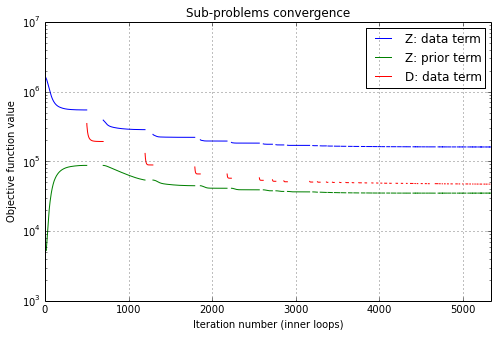

Inner loop: 5341 iterations
g(Z) = ||X-DZ||_2^2 = 4.705818e+04
rdiff: 0.00038527825897
i(Z) = ||Z||_1 = 3.500366e+04
j(Z) = tr(Z^TLZ) = 1.133580e+05


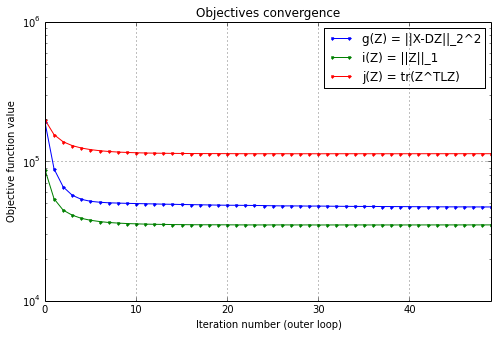

Global objective: 1.954199e+05


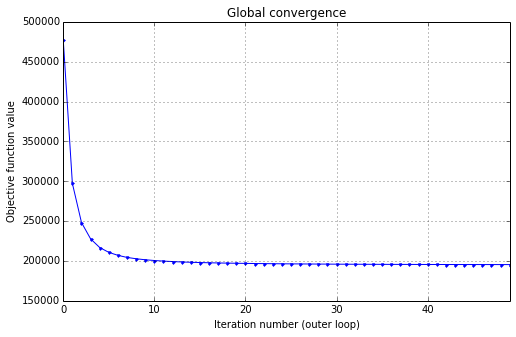

Outer loop: 50 iterations

Z in [-0.336860924959, 0.360780477524]
Sparsity of Z: 18,052,225 non-zero entries out of 19,072,000 entries, i.e. 94.7%.


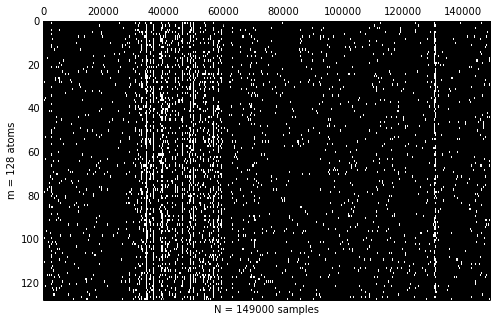

D in [-0.33844050765, 0.390165150166]
d in [0.999999761581, 1.00000011921]
Constraints on D: True


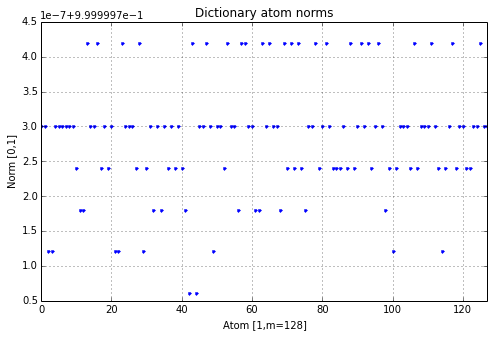

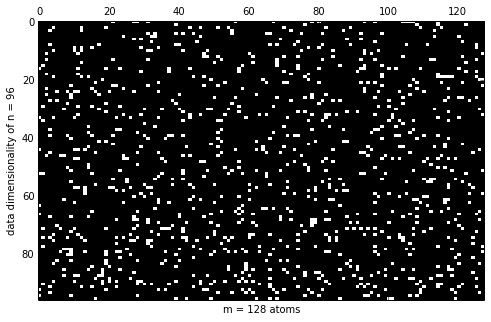

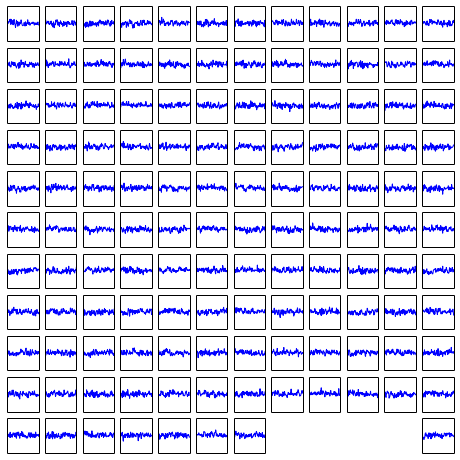

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 9708 seconds

 -------------------- Classification, ls = 0.1 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=1

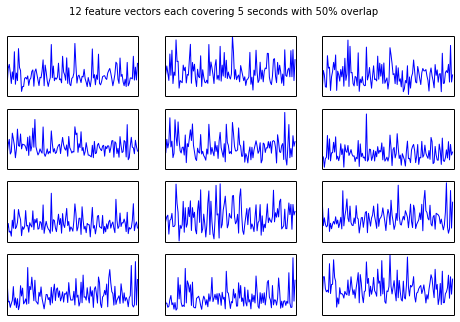

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 55.5 %
Clips accuracy: 61.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  69 (+/- 8.3) <- [62 76 72 60 70 82 62 54 76 72]
  65 (+/- 4.7) <- [62 68 57 57 64 70 72 68 64 70]
  68 (+/- 2.5) <- [64 72 72 70 68 66 66 68 70 68]
  70 (+/- 4.0) <- [64 74 66 74 68 66 74 72 76 70]
  68 (+/- 5.9) <- [62 68 64 74 68 78 74 57 70 64]
  67 (+/- 7.1) <- [62 82 62 57 74 64 66 62 74 64]
  69 (+/- 5.8) <- [56 70 64 72 68 74 68 74 78 70]
  68 (+/- 4.7) <- [74 60 70 70 74 62 62 66 68 70]
  67 (+/- 4.9) <- [76 60 66 68 66 70 62 66 60 72]
  66 (+/-

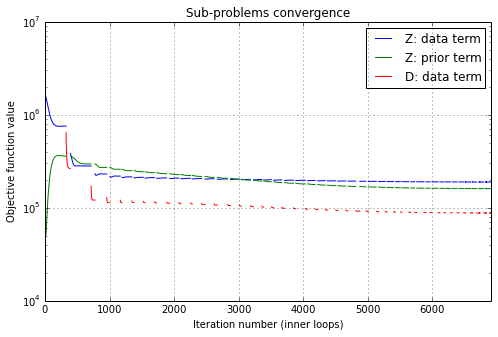

Inner loop: 6914 iterations
g(Z) = ||X-DZ||_2^2 = 8.763252e+04
rdiff: 0.0028535187222
i(Z) = ||Z||_1 = 1.608560e+05
j(Z) = tr(Z^TLZ) = 1.016077e+05


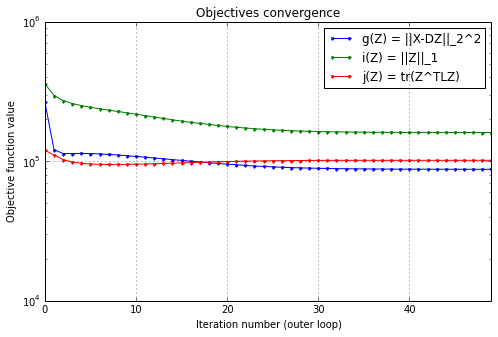

Global objective: 3.500962e+05


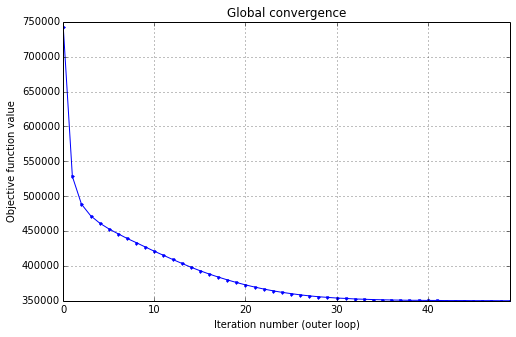

Outer loop: 50 iterations

Z in [-0.93200981617, 0.979693233967]
Sparsity of Z: 7,669,812 non-zero entries out of 19,072,000 entries, i.e. 40.2%.


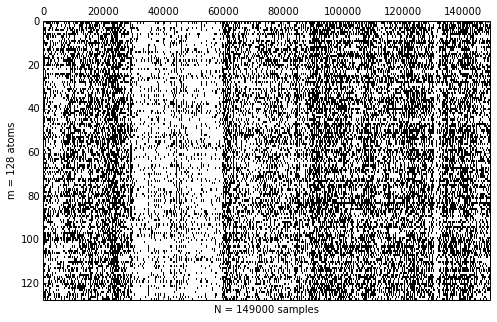

D in [-0.967727899551, 0.986068367958]
d in [0.999999642372, 1.00000035763]
Constraints on D: True


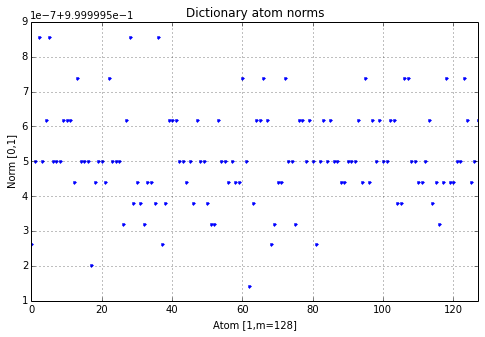

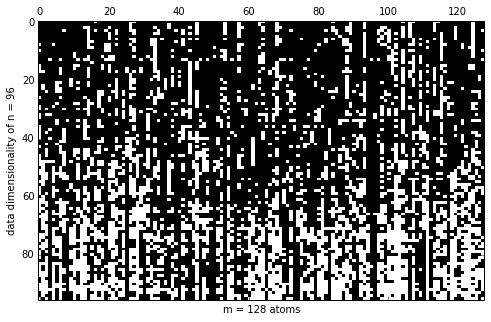

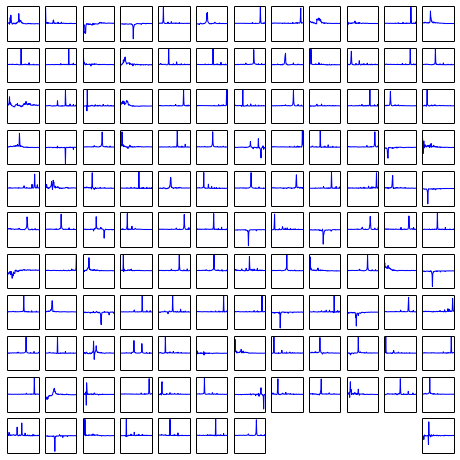

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 12262 seconds

 -------------------- Classification, ls = 1 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=12

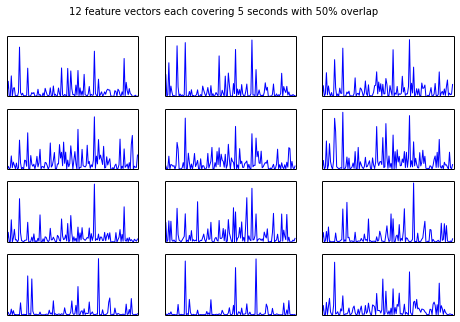

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.7 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 65.0 %
Clips accuracy: 77.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  73 (+/- 5.2) <- [64 74 76 76 68 82 70 66 76 74]
  73 (+/- 8.6) <- [68 72 74 50 82 80 74 80 74 76]
  73 (+/- 6.4) <- [70 78 82 66 78 64 64 78 78 70]
  72 (+/- 6.3) <- [68 78 74 64 76 76 72 72 82 60]
  72 (+/- 5.6) <- [66 70 80 70 76 76 74 62 80 70]
  73 (+/- 4.6) <- [76 80 74 78 74 76 64 70 68 72]
  72 (+/- 6.2) <- [60 80 66 76 82 72 68 74 70 74]
  74 (+/- 4.5) <- [72 72 80 76 82 74 74 70 66 70]
  73 (+/- 6.8) <- [76 74 68 72 88 64 70 80 70 66]
  73 (+/-

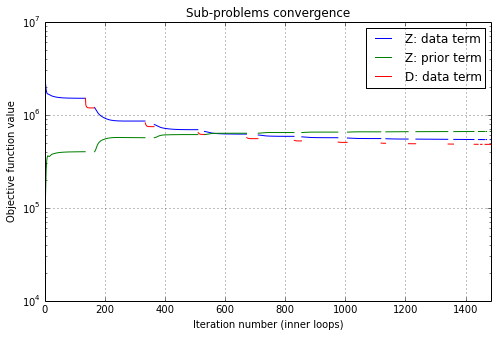

Inner loop: 1487 iterations
g(Z) = ||X-DZ||_2^2 = 4.794027e+05
rdiff: 0.00355280129654
i(Z) = ||Z||_1 = 6.617271e+05
j(Z) = tr(Z^TLZ) = 6.198570e+04


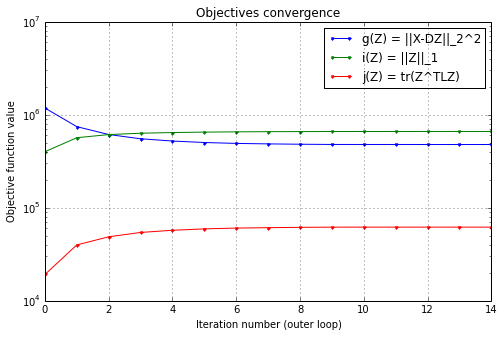

Global objective: 1.203116e+06


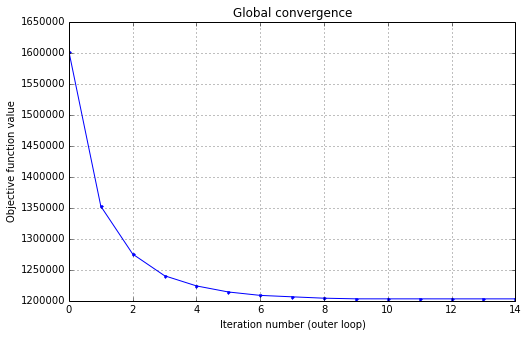

Outer loop: 15 iterations

Z in [-0.486856818199, 1.19251167774]
Sparsity of Z: 1,504,216 non-zero entries out of 19,072,000 entries, i.e. 7.9%.


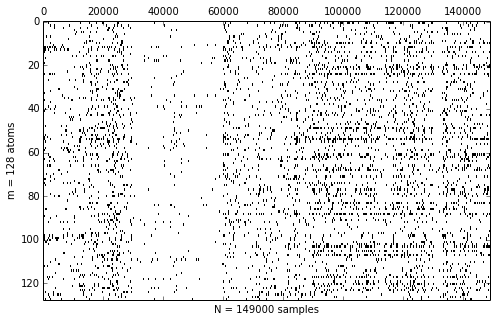

D in [-0.72549778223, 0.919754981995]
d in [0.999999642372, 1.00000023842]
Constraints on D: True


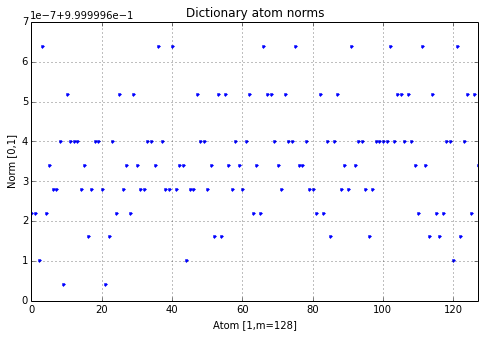

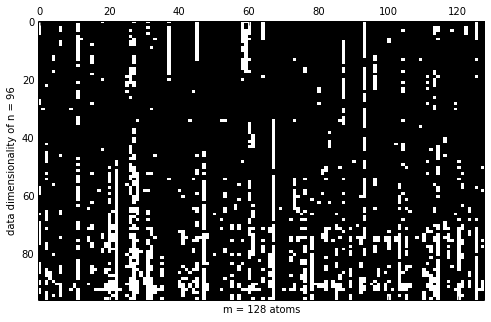

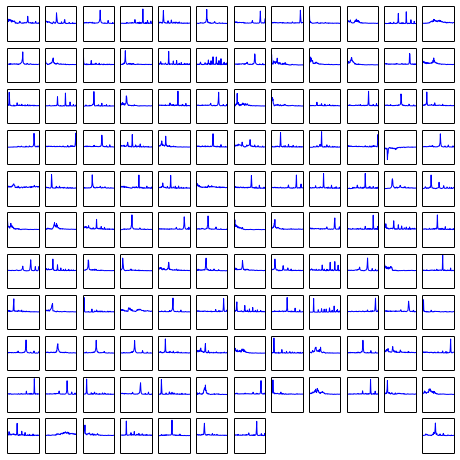

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2796 seconds

 -------------------- Classification, ls = 10 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=12

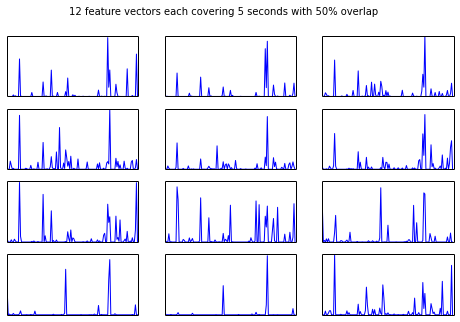

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 74.5 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 61.0 %
Clips accuracy: 68.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  71 (+/- 5.0) <- [78 74 68 66 62 72 74 64 74 74]
  71 (+/- 8.6) <- [64 78 80 54 80 80 76 68 62 72]
  72 (+/- 4.0) <- [74 74 78 74 68 68 64 76 74 72]
  71 (+/- 6.1) <- [57 74 72 72 70 70 80 70 80 66]
  73 (+/- 4.4) <- [62 76 68 78 74 74 76 74 72 72]
  73 (+/- 6.1) <- [62 82 78 66 76 74 74 70 78 66]
  70 (+/- 6.1) <- [68 80 62 72 66 66 64 70 78 78]
  71 (+/- 5.1) <- [66 66 66 72 80 70 74 80 68 70]
  71 (+/- 5.7) <- [78 64 66 78 72 76 64 68 66 78]
  69 (+/-

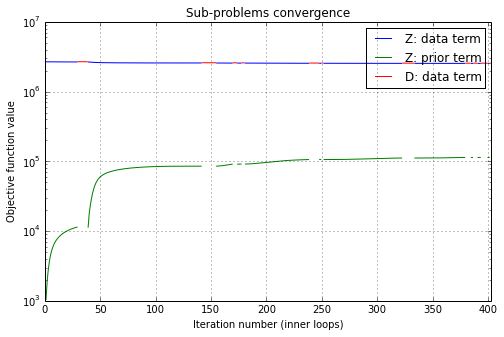

Inner loop: 404 iterations
g(Z) = ||X-DZ||_2^2 = 2.531211e+06
rdiff: 0.00806285653041
i(Z) = ||Z||_1 = 1.136244e+05
j(Z) = tr(Z^TLZ) = 2.192487e+03


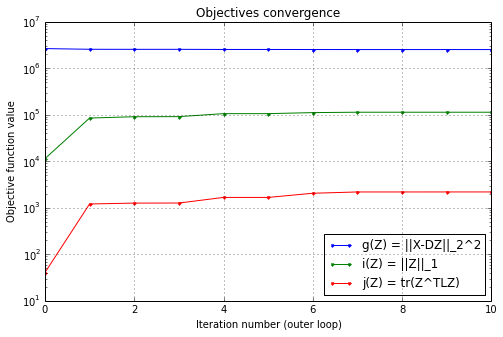

Global objective: 2.647028e+06


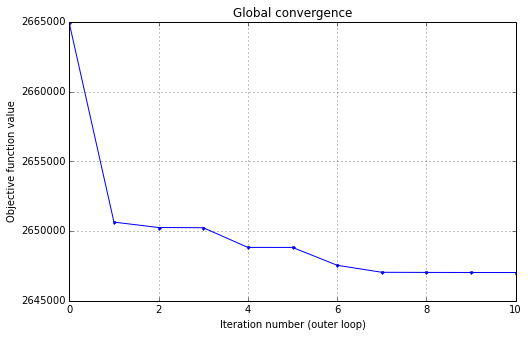

Outer loop: 11 iterations

Z in [0.0, 0.657184481621]
Sparsity of Z: 18,422 non-zero entries out of 19,072,000 entries, i.e. 0.1%.


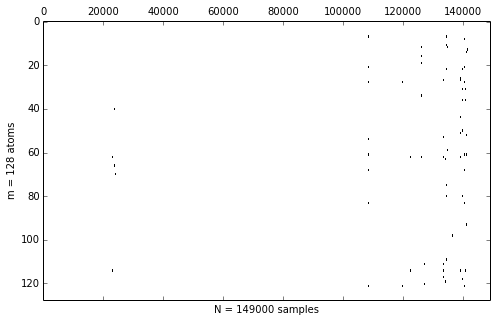

D in [-0.00530179822817, 0.607872366905]
d in [0.999999582767, 1.00000023842]
Constraints on D: True


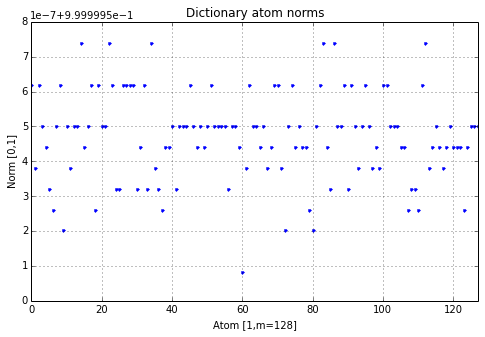

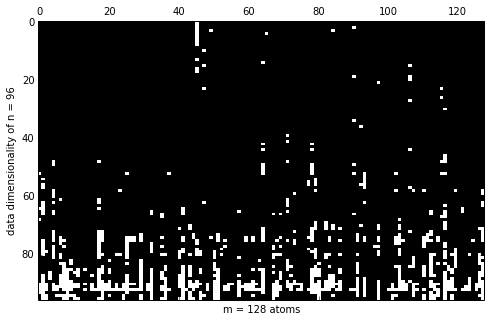

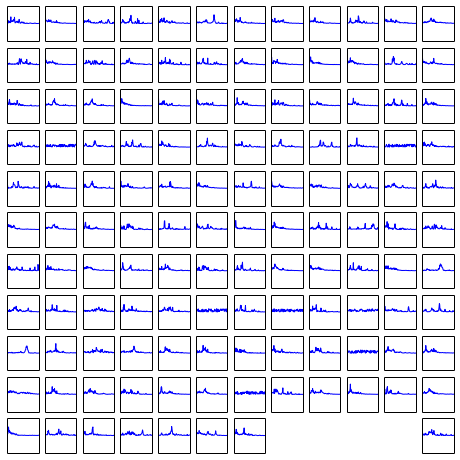

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 795 seconds

 -------------------- Classification, ls = 100 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=12

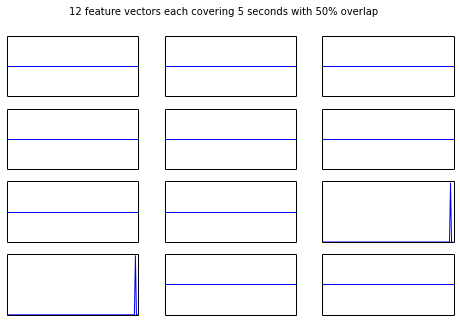

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 25.2 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 24.1 %
Clips accuracy: 24.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  18 (+/- 5.1) <- [22 26 16 10 14 22 16 12 24 20]
  18 (+/- 4.4) <- [12 14 24 22 18 14 22 24 16 14]
  20 (+/- 3.0) <- [22 18 16 18 18 24 20 18 26 22]
  18 (+/- 4.8) <- [18 14 24 18 24 12 16 12 20 26]
  18 (+/- 3.9) <- [12 20 20 12 22 18 22 18 24 16]
  19 (+/- 4.2) <- [16 18 18 24 20 12 14 26 16 22]
  19 (+/- 4.1) <- [14 20 22 16 26 20 18 24 12 18]
  20 (+/- 5.0) <- [22 26 20 16 26 20 14 24 18 10]
  19 (+/- 2.9) <- [16 14 22 16 20 18 20 20 24 20]
  20 (+/-

/home/ubuntu/.virtualenvs/dlaudio/lib/python2.7/site-packages/IPython/kernel/__main__.py:86: RuntimeWarning: divide by zero encountered in double_scalars
/home/ubuntu/dlaudio/pyunlocbox/solvers.py:451: RuntimeWarning: invalid value encountered in multiply
  x = self.z - self.step * self.f2.grad(self.z)



  K = 11
  dm = cosine
  Csigma = 1
  diag = True
  laplacian = normalized
Datasets:
  L_data    : (2396026,), float32
  L_indices : (2396026,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2396026,), float32
  W_indices : (2396026,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Size X: 13.6 M --> 54.6 MiB
Size Z: 18.2 M --> 72.8 MiB
Size D: 12.0 k --> 48.0 kiB
Size E: 12.0 k --> 48.0 kiB
Elapsed time: 61361 seconds


/usr/lib/pymodules/python2.7/matplotlib/scale.py:90: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0
/usr/lib/python2.7/dist-packages/numpy/ma/core.py:790: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


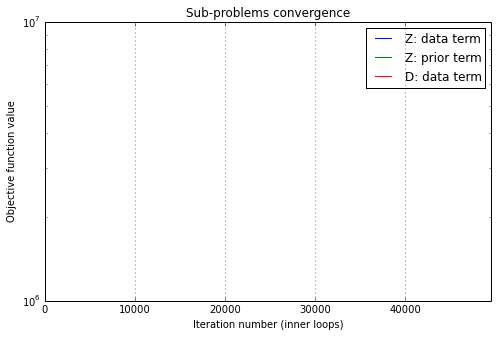

Inner loop: 49601 iterations


ValueError: Data has no positive values, and therefore can not be log-scaled.

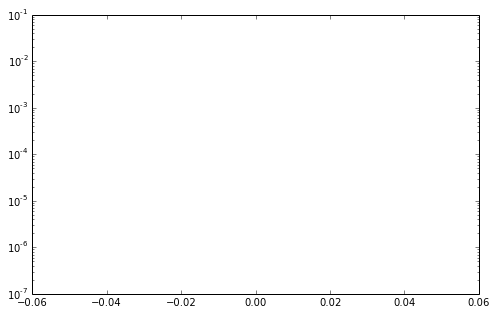


 -------------------- Classification, ls = 1000.0 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 298, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,280,000 floats
  dim: 34,560 features per clip
  shape: (5, 100, 6, 45, 128)
Truncated and grouped:
  size: N=135,000 x n=128 -> 17,

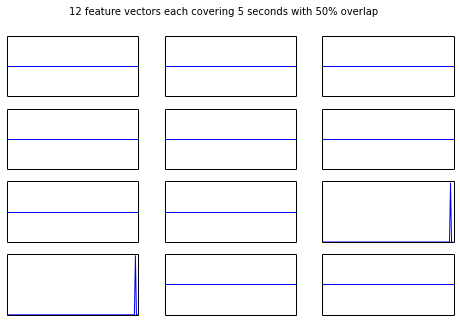

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 25.2 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 24.1 %
Clips accuracy: 24.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  18 (+/- 5.1) <- [22 26 16 10 14 22 16 12 24 20]
  18 (+/- 4.4) <- [12 14 24 22 18 14 22 24 16 14]
  20 (+/- 3.0) <- [22 18 16 18 18 24 20 18 26 22]
  18 (+/- 4.8) <- [18 14 24 18 24 12 16 12 20 26]
  18 (+/- 3.9) <- [12 20 20 12 22 18 22 18 24 16]
  19 (+/- 4.2) <- [16 18 18 24 20 12 14 26 16 22]
  19 (+/- 4.1) <- [14 20 22 16 26 20 18 24 12 18]
  20 (+/- 5.0) <- [22 26 20 16 26 20 14 24 18 10]
  19 (+/- 2.9) <- [16 14 22 16 20 18 20 20 24 20]
  20 (+/-

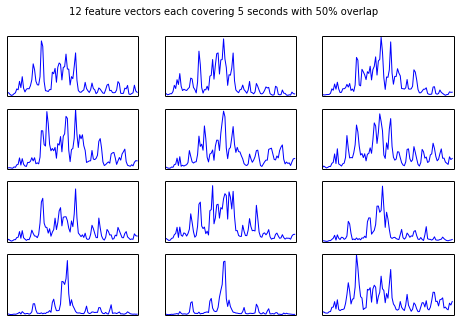

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1152), float64
Labels: (500,), uint8
  67 (+/- 8.0) <- [72 74 60 48 62 74 72 66 66 74]
  66 (+/- 6.5) <- [70 60 62 52 64 70 72 68 66 76]
  68 (+/- 6.7) <- [74 68 84 62 68 70 62 62 70 62]
  68 (+/- 5.5) <- [60 72 62 66 74 74 72 64 76 64]
  67 (+/- 5.1) <- [57 74 66 70 68 64 72 62 74 64]
  68 (+/- 6.1) <- [68 78 74 64 72 70 68 57 57 66]
  66 (+/- 3.7) <- [62 70 60 68 68 66 60 68 70 68]
  67 (+/- 5.9) <- [68 60 57 68 80 64 64 68 64 72]
  65 (+/- 6.0) <- [68 54 68 66 76 62 68 70 62 57]
  66 (+/- 6

In [5]:
#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    separator('Graph')
    %run audio_graph.ipynb
if not regen_features:
    separator('Features')
    %run audio_features.ipynb

# Hyper-parameter under test.
for n_exp, p[Pname] in enumerate(Pvalues):

    if regen_graph:
        separator('Graph', True)
        %run audio_graph.ipynb
    if regen_features:
        separator('Features', True)
        %run audio_features.ipynb
    separator('Classification', True)
    %run audio_classification.ipynb
    
    # Collect results.
    for key in res:
        res[key].append(globals()[key])

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if not regen_graph and not regen_features:
    # Classifier parameters are being tested.
    for p[Pname] in Pvalues:
        separator('Baseline', True)
        %run audio_classification.ipynb
else:
    separator('Baseline')
    %run audio_classification.ipynb

## Results

ls: [0.1, 1, 10, 100, 1000.0]
accuracy_std: [6.0086520951041953, 5.9056244377711673, 6.3308767165377695, 4.2293734760600197, 4.2293734760600197]
objective_j: [113358.04443359375, 101607.73315429688, 61985.699462890625, 2192.4869537353516, 2192.4869537353516]
objective_i: [35003.662499999999, 160855.953125, 661727.109375, 113624.37744140625, 113624.37744140625]
objective_h: [0, 0, 0, 0, 0]
objective_g: [47058.1787109375, 87632.51953125, 479402.734375, 2531210.7421875, 2531210.7421875]
time_features: [9700.575558900833, 12253.139140844345, 2786.0791459083557, 783.5279347896576, 61360.89183306694]
sparsity: [94.65302537751678, 40.215037751677855, 7.887038590604027, 0.09659186241610739, 0.09659186241610739]
iterations_inner: [5341, 6914, 1487, 404, 404]
iterations_outer: [50, 50, 15, 11, 11]
accuracy: [67.810000000000045, 73.060000000000016, 70.599999999999994, 18.819999999999979, 18.819999999999979]


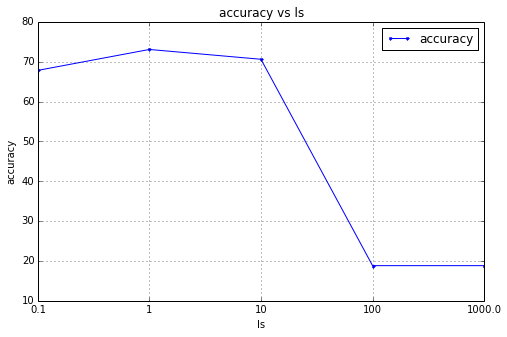

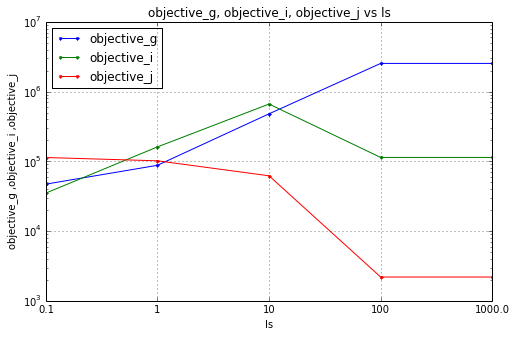

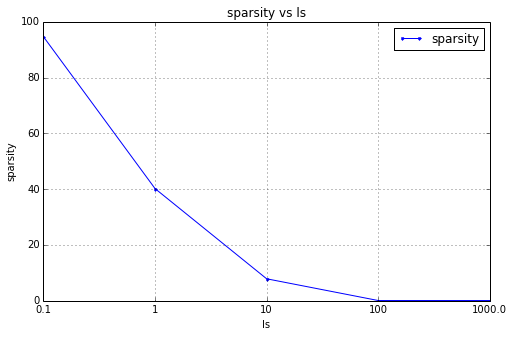

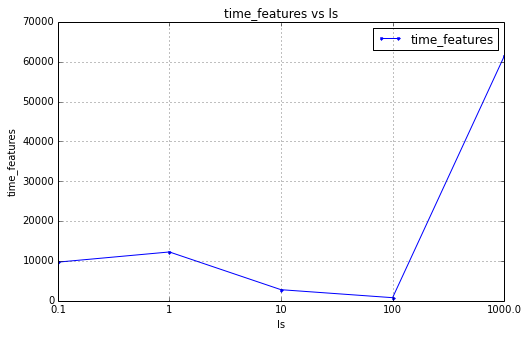

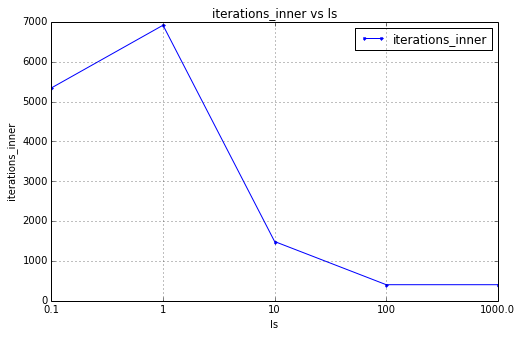

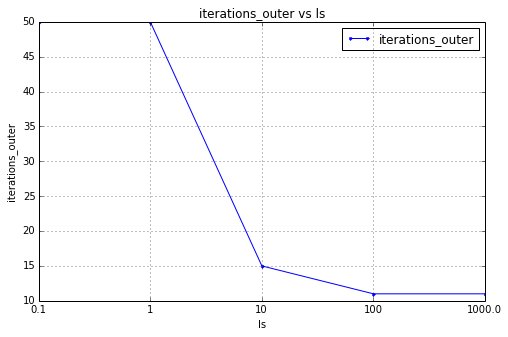

Dictionary atoms for ls = 0.1
Dictionary atoms for ls = 1
Dictionary atoms for ls = 10
Dictionary atoms for ls = 100
Dictionary atoms for ls = 1000.0


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


AttributeError: 'function' object has no attribute 'show'

In [6]:
print('{}: {}'.format(Pname, Pvalues))
for key, value in res.items():
    if key is not 'atoms':
        print('{}: {}'.format(key, value))

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    for var in args:
        pltfunc(x, res[var], '.-', label=var)
    plt.xlim(0, len(Pvalues)-1)
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

# Classification results.
plot('accuracy')

# Features extraction results.
if regen_features:
    plot('objective_g', 'objective_i', 'objective_j', log=True)
    plot('sparsity')
    plot('time_features')
    plot('iterations_inner')
    plot('iterations_outer')

    for i, fig in enumerate(res['atoms']):
        print('Dictionary atoms for {} = {}'.format(Pname, Pvalues[i]))
        fig.show()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))